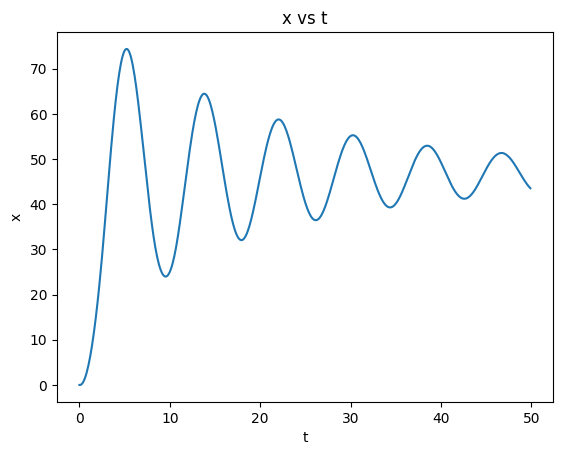

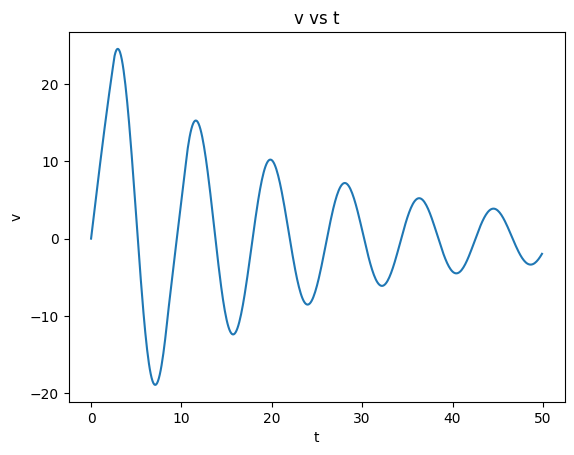

In [1]:
# THIS IMPLEMENTS RK4 AND EVALUATES X AND V
x = []
v = []
x_i = 0
v_i = 0
t = 0
h = 0.1

t = []
t_end = 50
for k in range(int(t_end/h)):
    t.append(k*h)

x.append(x_i)
v.append(v_i)

g = 9.81
L = 30
m = 68.1
cd = 0.25
k = 40 
gamma = 8

def sign(v):
    if v < 0:
        return -1
    else :
        return 1

def v_deri_before(x,v):
    v_deri = g - sign(v)*(cd/m)*(v**2)
    return v_deri

def v_deri_after(x,v):
    v_deri = g - sign(v)*(cd/m)*(v**2) - (k/m)*(x - L) - (gamma/m)*v
    return v_deri

for j in range(len(t)-1) :
    if x_i < L :
        k1 = h * v_deri_before(x_i, v_i)
        k2 = h * v_deri_before(x_i + h/2, v_i + k1/2)
        k3 = h * v_deri_before(x_i + h/2, v_i + k2/2)
        k4 = h * v_deri_before(x_i + h, v_i + k3)
        v_i1 = v_i + (k1 + 2*k2 + 2*k3 + k4) / 6
        x_i1 = x_i + v_i*h
    
    else :
        k1 = h * v_deri_after(x_i, v_i)
        k2 = h * v_deri_after(x_i + h/2, v_i + k1/2)
        k3 = h * v_deri_after(x_i + h/2, v_i + k2/2)
        k4 = h * v_deri_after(x_i + h, v_i + k3)
        v_i1 = v_i + (k1 + 2*k2 + 2*k3 + k4) / 6
        x_i1 = x_i + v_i*h
    
    x.append(x_i1)
    v.append(v_i1)
    x_i = x_i1
    v_i = v_i1


print("velocity : ",v[-1])
print("Distance : ",x[-1])

import matplotlib.pyplot as plt
plt.plot(t,x)
plt.xlabel('t')
plt.ylabel('x')
plt.title('x vs t')
plt.show()

plt.plot(t,v)
plt.xlabel('t')
plt.ylabel('v')
plt.title('v vs t')
plt.show()